In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
#import streamlit as st
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')


In [63]:
#Data Acquisition
df = pd.read_csv('C:/Data Science Project/student_data.csv')
Target = df.iloc[:, -1]
#Data Description
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [64]:
#Data Cleaning

print(df.isnull().sum())

# 1 Check for Missing Values
c = avg = 1
for ele in df:
  if str(ele).isnumeric():
    c += 1
    avg += ele
  avg /= c
# Replace missing values
df = df.replace(to_replace="NaN", value=avg)
print ("\n***There are no missing/null values***\n")


# 2 Remove Duplicates
non_duplicate = df[~df.duplicated(df.columns)]
print (non_duplicate)
print ("\n***There are no duplicates***\n")

print ("***The data set is clean , we will use as it is***\n")

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

***There are no missing/null values***

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16    

{'activities', 'schoolsup', 'internet', 'Fjob', 'famsize', 'reason', 'guardian', 'romantic', 'address', 'sex', 'paid', 'Mjob', 'nursery', 'Pstatus', 'famsup', 'higher', 'school'}
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1

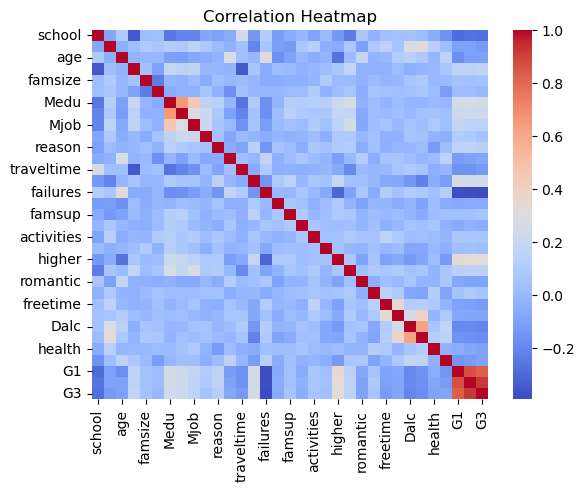

In [65]:
##Determining Relevant features##

#Detect non-numeric datatypes
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
print (non_numeric_cols)

# Convert non-numeric columns into numerical values using Label Encoding
label_encoders = LabelEncoder()
for col in non_numeric_cols:
    df[col] = label_encoders.fit_transform(df[col])
    
#DataFrame after converting non-numeric to numeric
print(df)    

#Finding correlation matrix of all variables
correlation_matrix = df.corr()                       

print("Correlation Matrix:")
print(correlation_matrix)


#HeatMap for all variables
sns.heatmap(correlation_matrix, cmap='coolwarm')     
plt.title('Correlation Heatmap')
plt.show()

In [66]:
#Deciding which features attribute to our Target "G3"
G3_Corr = correlation_matrix.columns[-1]

Correlation_Relevant = []
for feature in correlation_matrix.columns[:-1]:  # Exclude the last variable
    if abs(correlation_matrix.loc[feature,G3_Corr]) > 0.2:
        Correlation_Relevant.append(feature)
        
print("Features contributing to our target according to the Correlation matrix:", Correlation_Relevant)
Relevant_DataSet=df[Correlation_Relevant]
Relevant_DataSet['G3']=Target
#Our New DataSet "Relevant_DataSet"
print(Relevant_DataSet)

Features contributing to our target according to the Correlation matrix: ['school', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'Dalc', 'G1', 'G2']
     school  Medu  Fedu  studytime  failures  higher  Dalc  G1  G2  G3
0         0     4     4          2         0       1     1   0  11  11
1         0     1     1          2         0       1     1   9  11  11
2         0     1     1          2         0       1     2  12  13  12
3         0     4     2          3         0       1     1  14  14  14
4         0     3     3          2         0       1     1  11  13  13
..      ...   ...   ...        ...       ...     ...   ...  ..  ..  ..
644       1     2     3          3         1       1     1  10  11  10
645       1     3     1          2         0       1     1  15  15  16
646       1     1     1          2         0       1     1  11  12   9
647       1     3     1          1         0       1     3  10  10  10
648       1     3     2          1         0       1     3  10  

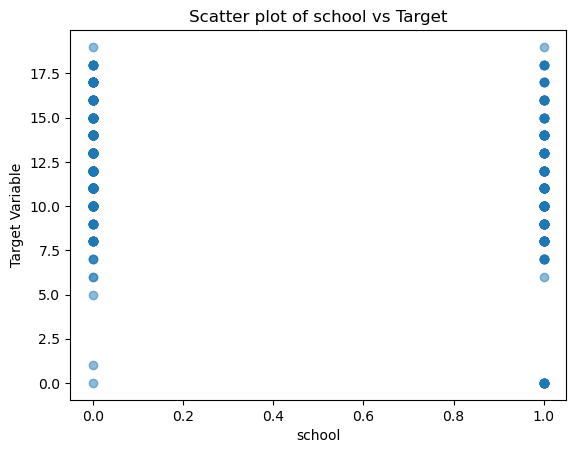

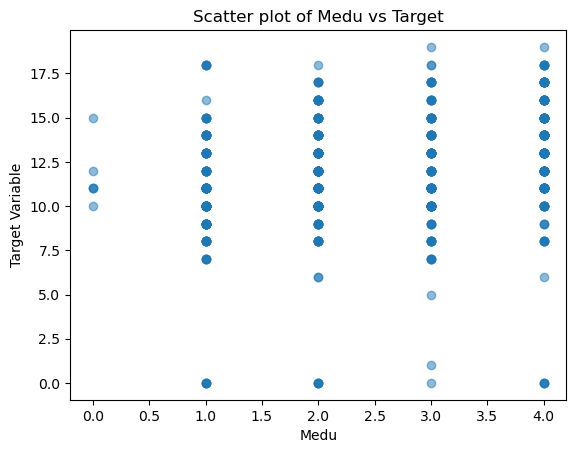

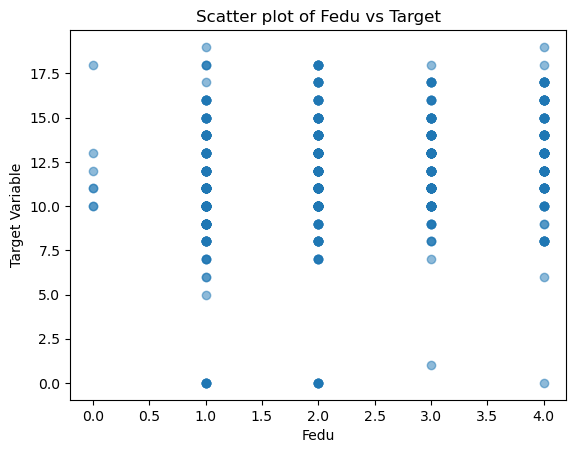

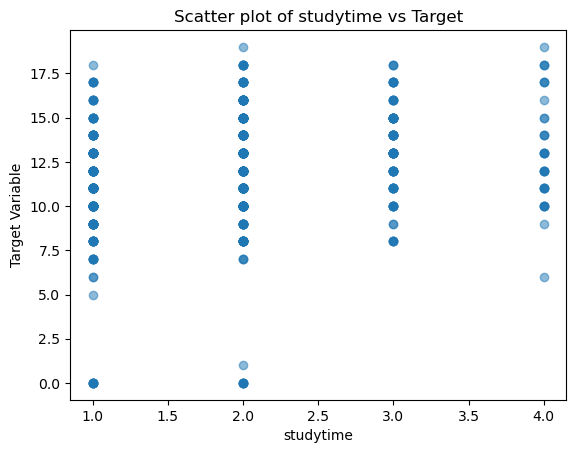

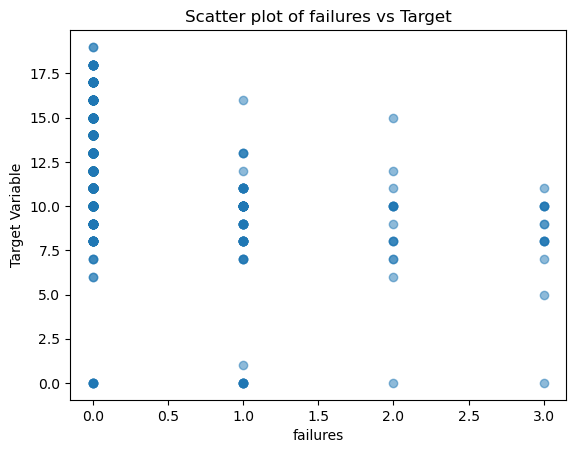

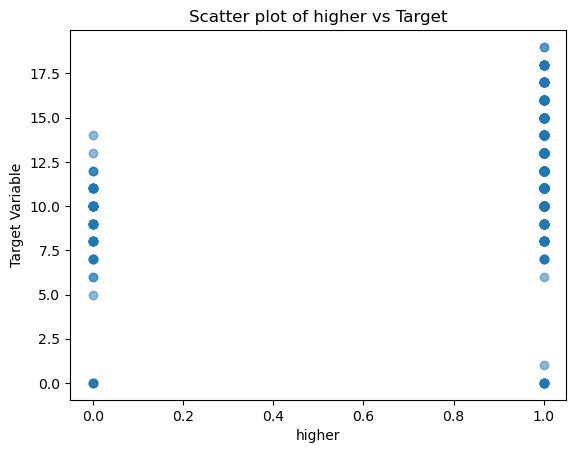

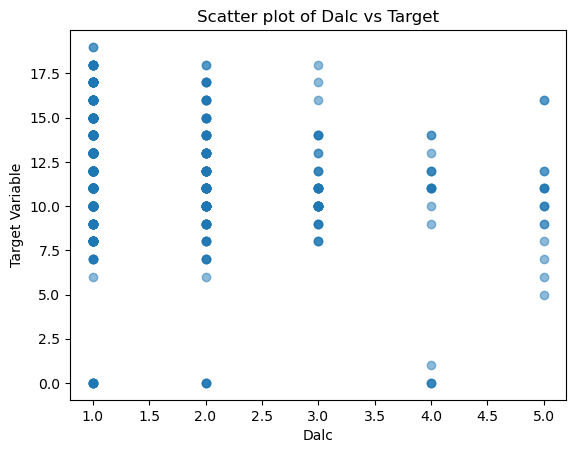

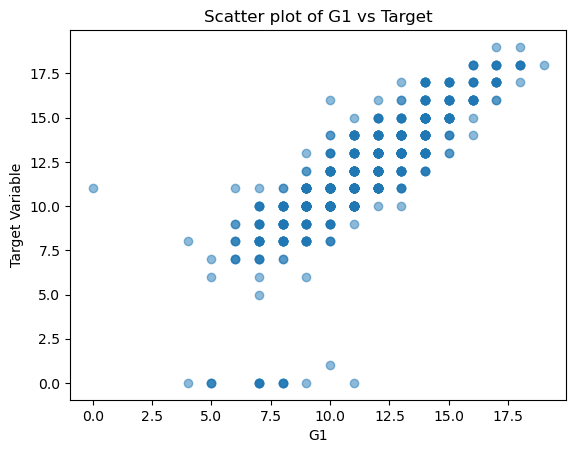

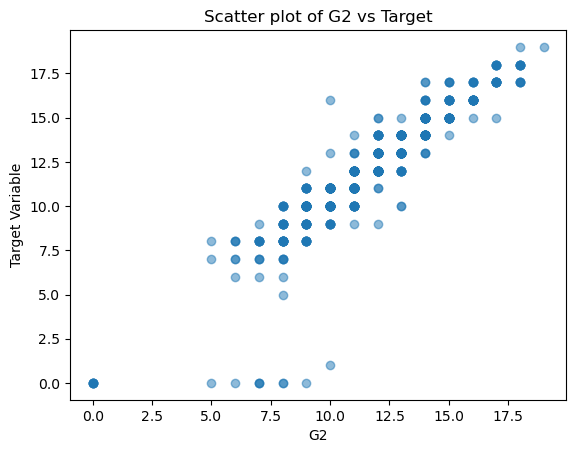

In [67]:
##Data Visualization##
Features = Relevant_DataSet.iloc[:, :9]

#Scatter Plot#
for Feature_Name in Features.columns:
    plt.scatter(Features[Feature_Name], Target, alpha=0.5)
    plt.xlabel(Feature_Name)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter plot of {Feature_Name} vs Target')
    plt.show()

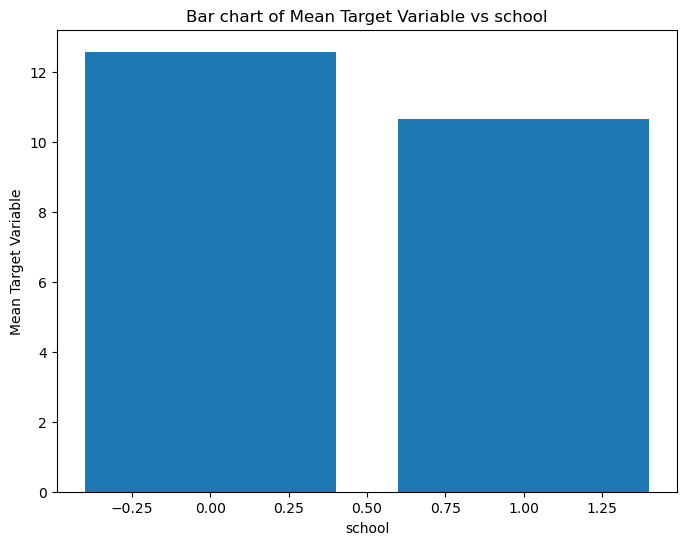

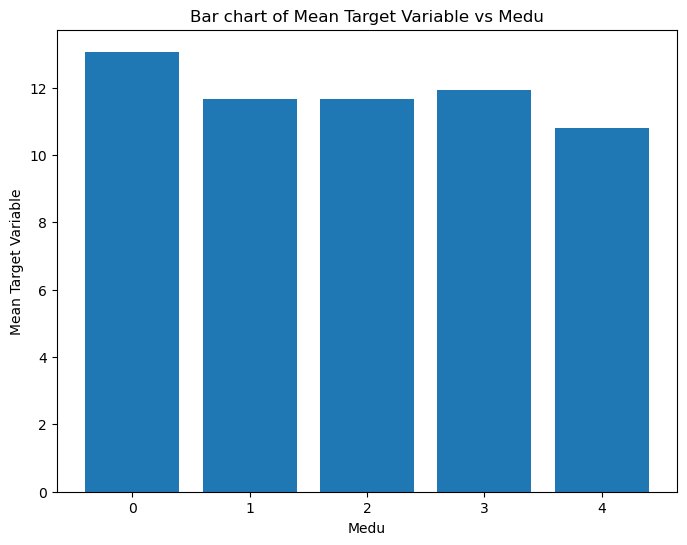

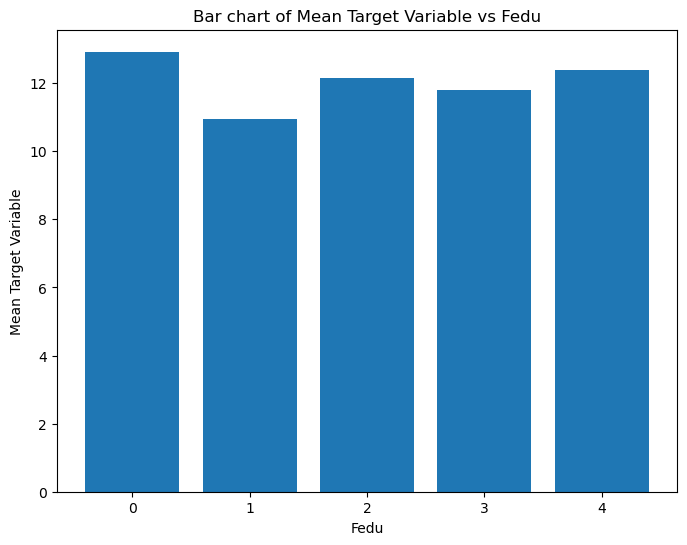

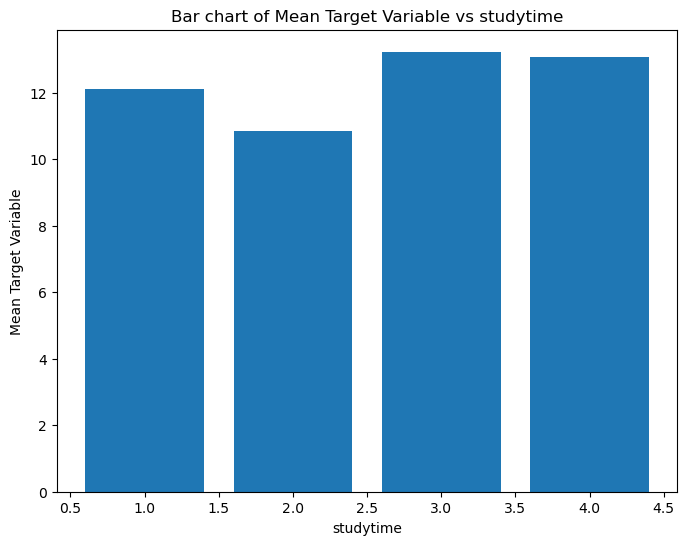

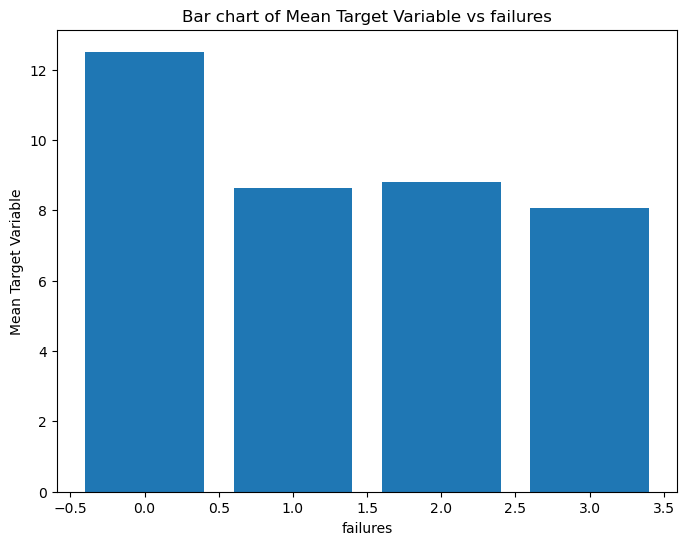

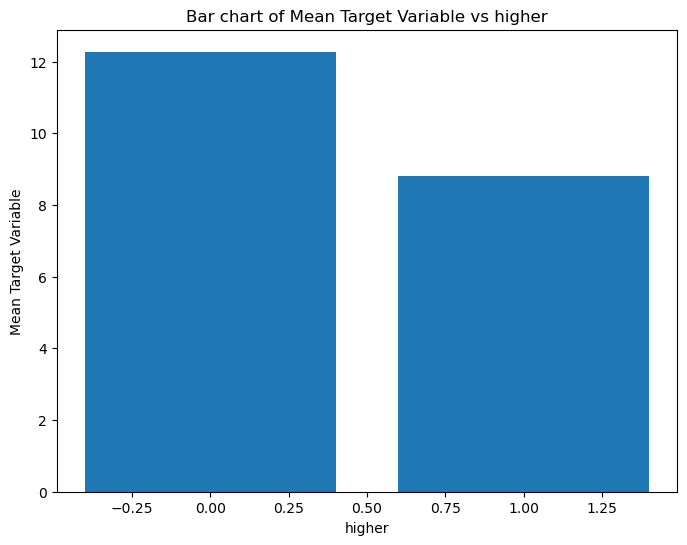

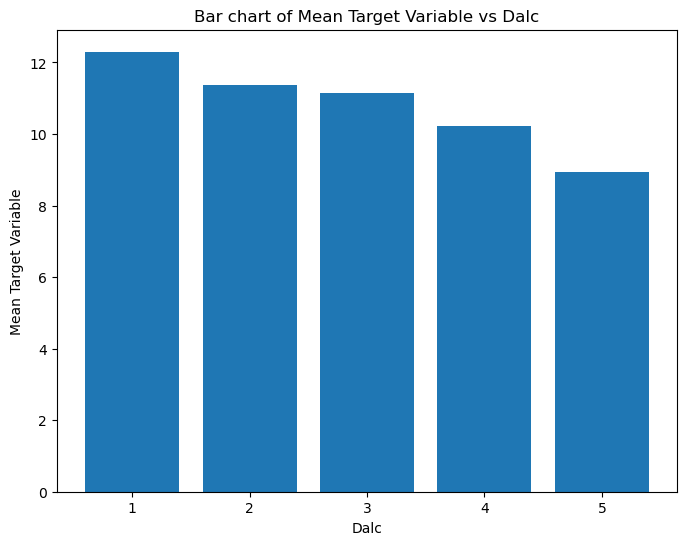

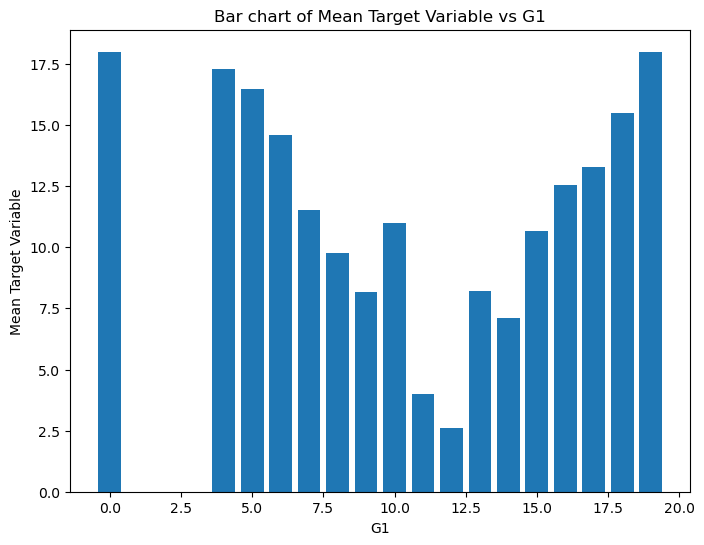

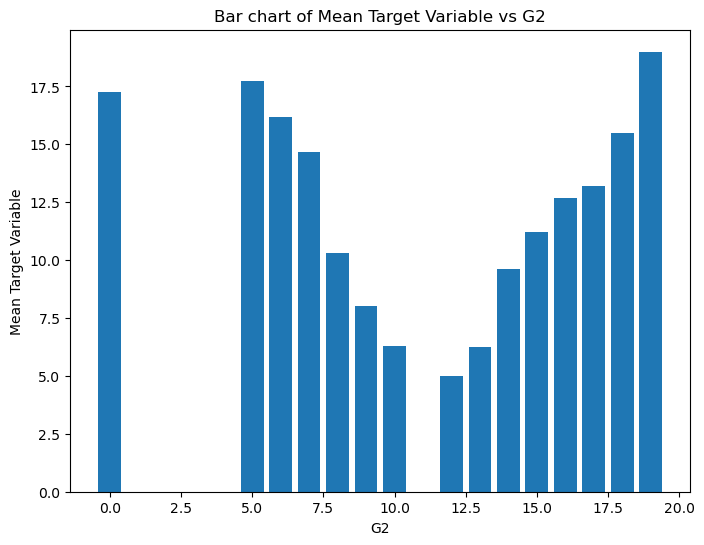

In [68]:
#Bar Chart#

for Feature_Name in Features.columns:
    plt.figure(figsize=(8, 6))
    feature_counts = Features[Feature_Name].value_counts()
    plt.bar(feature_counts.index, Target.groupby(Features[Feature_Name]).mean())
    plt.xlabel(Feature_Name)
    plt.ylabel('Mean Target Variable')
    plt.title(f'Bar chart of Mean Target Variable vs {Feature_Name}')
    plt.show()

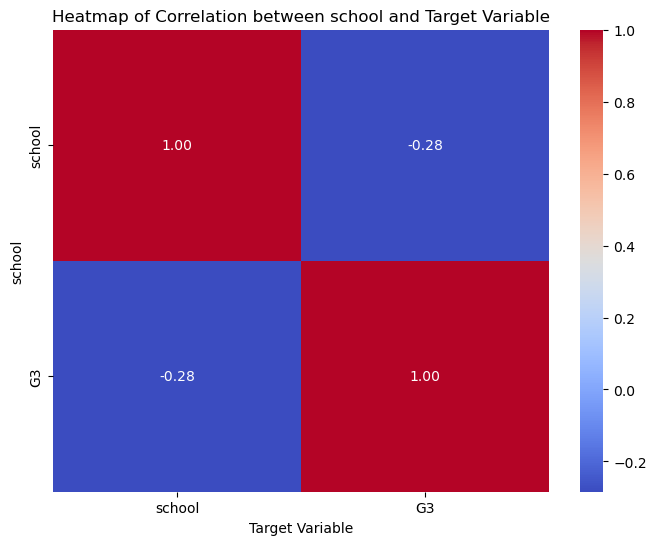

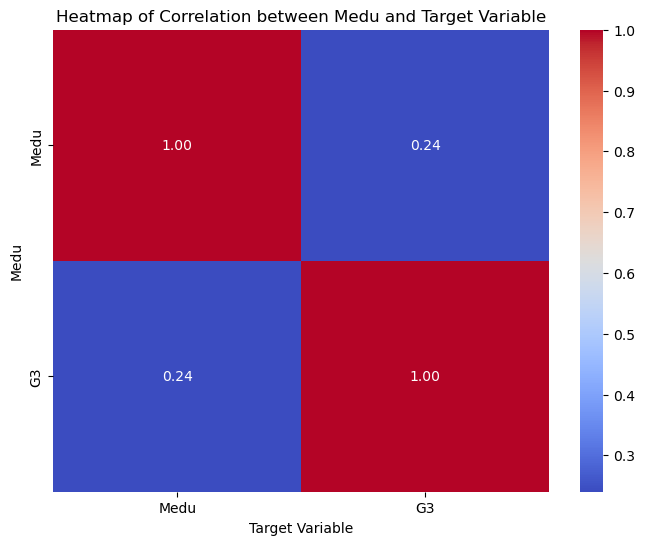

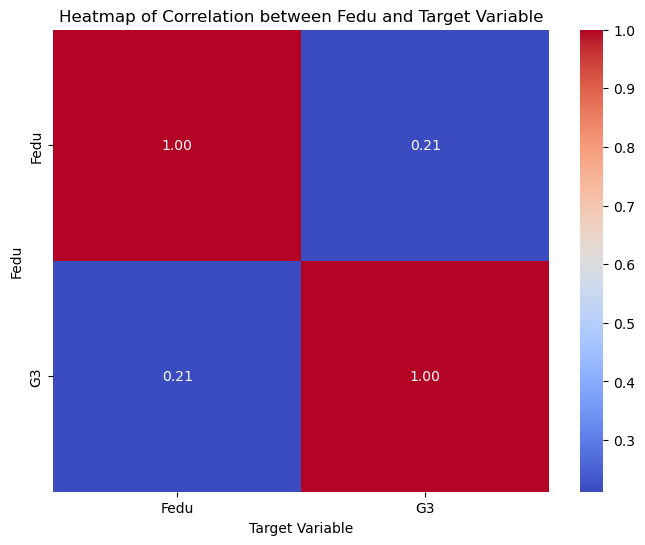

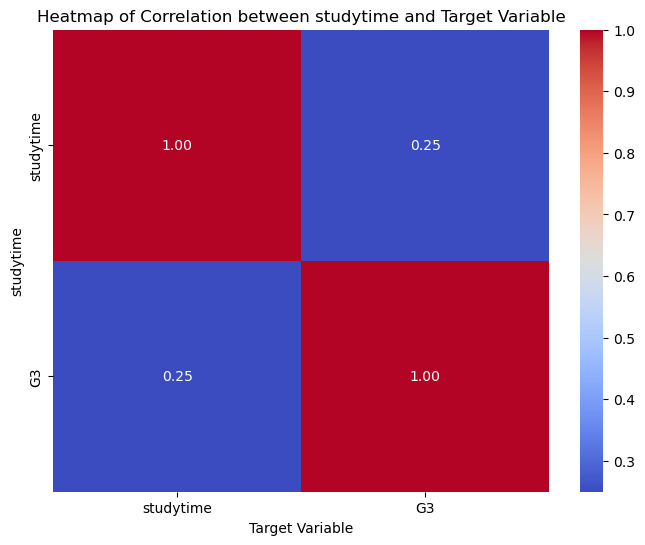

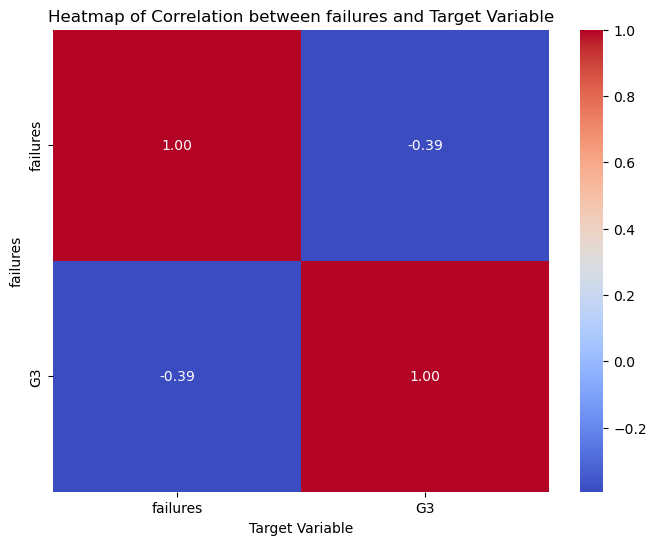

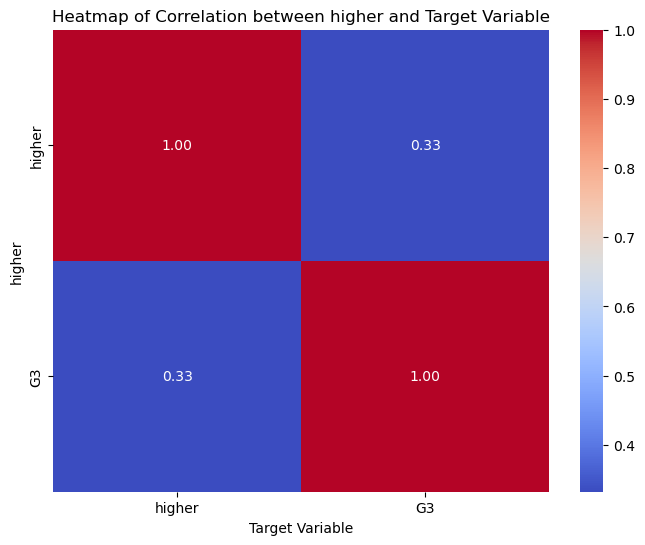

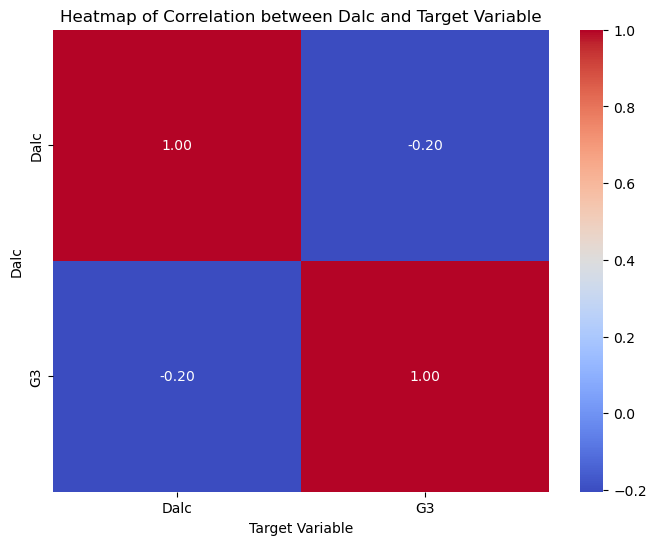

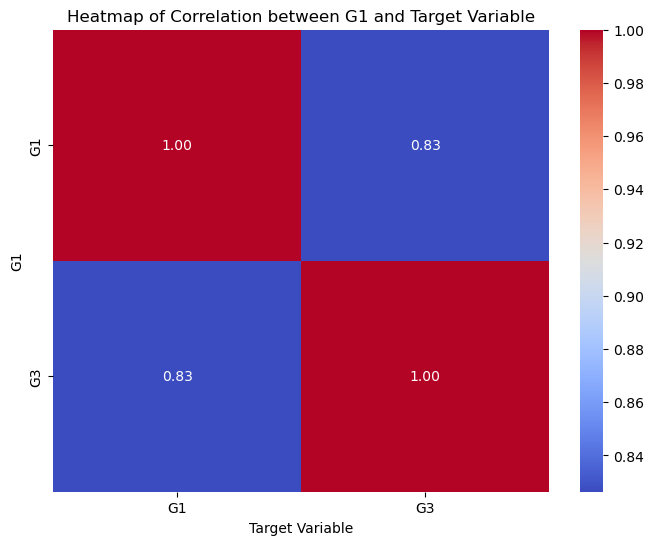

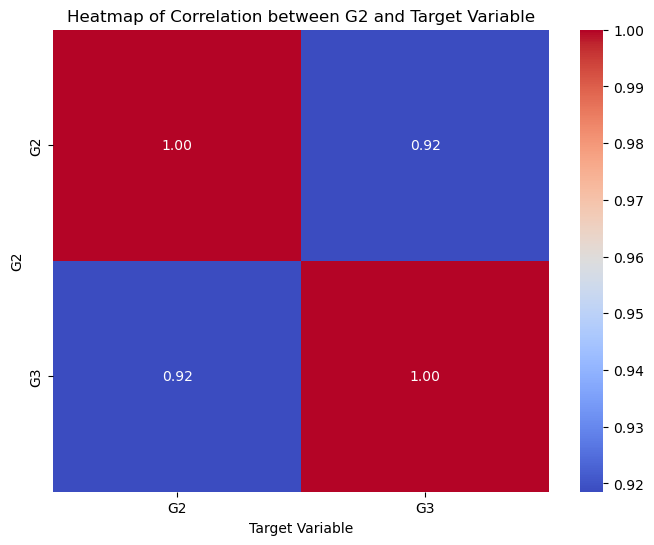

In [69]:
#HeatMap#

for Feature_Name in Features.columns:
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.concat([Features[Feature_Name], Target], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Heatmap of Correlation between {Feature_Name} and Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(Feature_Name)
    plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, yTrain, test_size=0.2, random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train RMSE: 4.394109630853473e-15
Test RMSE: 4.6071854110421096e-15
